In [6]:
import pandas as pd
import numpy as np
import math
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import linalg

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

# sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import IsolationForest

# Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


In [7]:
df = pd.read_csv('../creditcard.csv')

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df = df.sample(frac=1)  #shuffle


# undersampling
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
df_un = normal_distributed_df.sample(frac=1, random_state=42)

# oversampling with SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(df.drop('Class', axis=1), df['Class'])

In [8]:
X_sm.shape, y_sm.shape

((568630, 30), (568630,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

In [10]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(df_un.drop('Class', axis=1), df_un['Class'], test_size=0.3, random_state=42)
X_train_un.shape, y_train_un.shape, X_test_un.shape, y_test_un.shape

((688, 30), (688,), (296, 30), (296,))

In [11]:
X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
X_train_ov.shape, y_train_ov.shape, X_test_ov.shape, y_test_ov.shape

((398041, 30), (398041,), (170589, 30), (170589,))

In [12]:
tree = RandomForestClassifier()
tree.fit(X_train, y_train)

RandomForestClassifier()

(-1.0, 30.0)

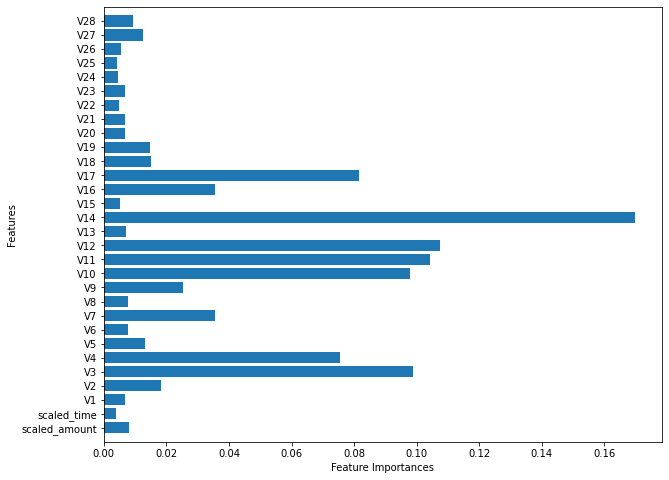

In [23]:
import matplotlib.pyplot as plt

n_features = tree.feature_importances_.shape[0]
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.ylim(-1, n_features)

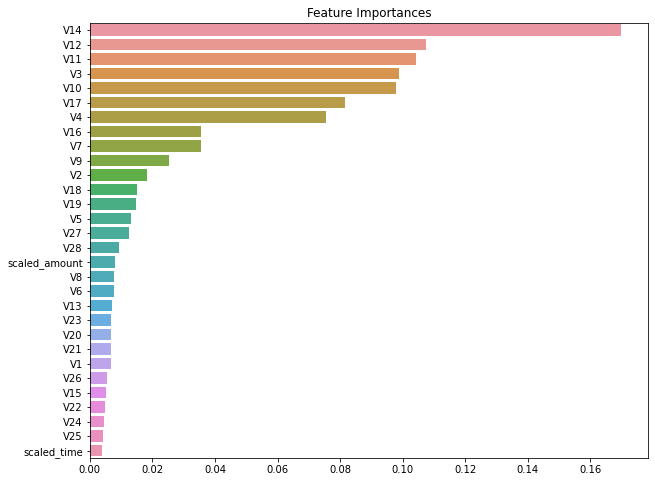

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = tree.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:]

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

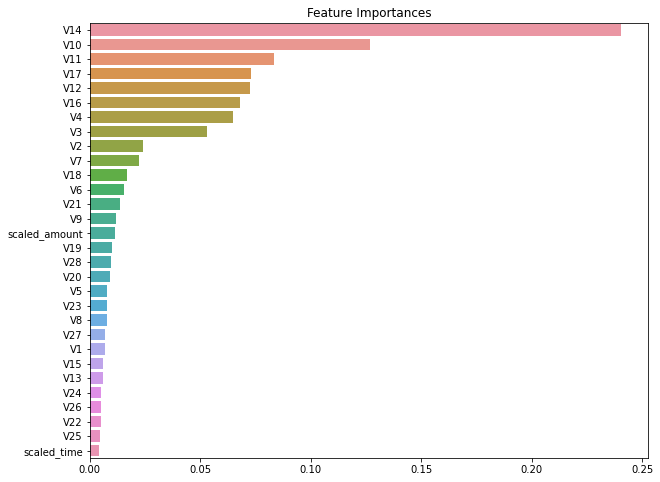

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = un_tree.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:]

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.savefig('fig1.png')
plt.show()

(-1.0, 30.0)

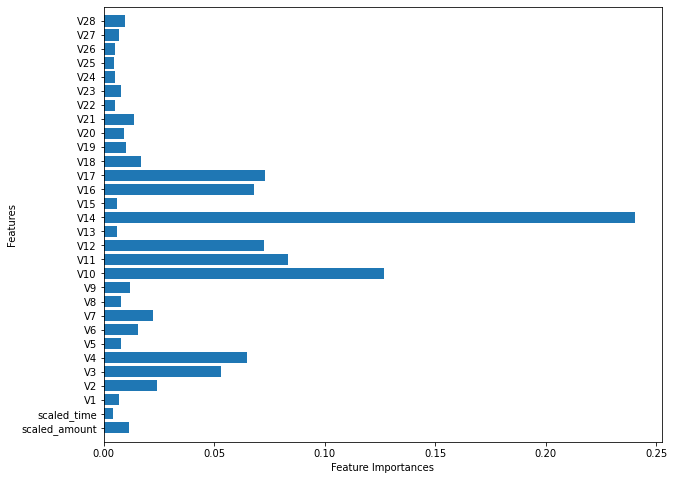

In [24]:
un_tree = RandomForestClassifier()
un_tree.fit(X_train_un, y_train_un)

n_features = un_tree.feature_importances_.shape[0]
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), un_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train_un.columns)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.ylim(-1, n_features)

In [27]:
import plotly.graph_objects as go

rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy', random_state = 0)
rnd_clf.fit(X_train, y_train);

x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, X_train.columns), reverse = False)))
trace2 = go.Bar(x=x, y=y, marker=dict(color=x, colorscale = 'Viridis', reversescale = True),  name='Random Forest Feature importance', orientation='h',)

layout = dict(title='Barplot of Feature importances', width = 600, height = 1000,
              yaxis=dict(showgrid=False, showline=False, showticklabels=True,),
              margin=dict(l=300,))

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

NameError: name 'iplot' is not defined